<a href="https://colab.research.google.com/github/hashmis79/SRAAssignments/blob/master/Edge-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose and option
1)Vertical Edge detection
2)Horizontal Edge detection
3)Sobel edge detection
4)Canny Edge Detection3
(340, 340, 3)
(344, 344, 3)
(342, 342, 3)
(342, 342, 3)


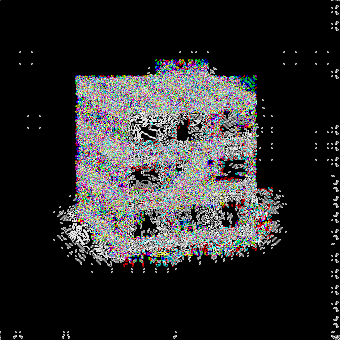

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def applyPadding(array,x):
  new = np.zeros((array.shape[0]+(2*x),array.shape[1]+(2*x),array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+int(x/2),j+int(x/2),s] = array[i,j,s]
  return new

def applyKernel(kernel,matrix):
  padded_Matrix = applyPadding(matrix,int((kernel.shape[0]-1)/2))
  print(padded_Matrix.shape)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        sum = 0.0
        for y in range(kernel.shape[0]):
          for x in range(kernel.shape[1]):
            sum = sum + kernel[y,x]*padded_Matrix[i+y,j+x,s]
        filtered[i,j,s] = sum
  return filtered     
image = plt.imread('edge-detection2.jpg')
option =int(input('Choose and option\n1)Vertical Edge detection\n2)Horizontal Edge detection\n3)Sobel edge detection\n4)Canny Edge Detection'))
print(image.shape)
if option == 1:
  kernel_box = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  filtered = applyKernel(kernel_box,image)
elif option == 2:
  kernel_box = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  filtered = applyKernel(kernel_box,image)
  filtered *= 255.0/filtered.max()
elif option == 3:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
  image = applyKernel(kernel_box,image)
  kernel_box = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
  vertical = applyKernel(kernel_box,image)
  kernel_box = np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
  horizontal = applyKernel(kernel_box,image)
  filtered = np.sqrt(np.square(horizontal)+np.square(vertical))
  filtered *= 255.0/filtered.max()

# plt.imshow(image)
# print(filtered)
cv2_imshow(filtered)